# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [50]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tazovsky
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | maceio
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port saint john's
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | helena valley west central
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | mount pearl
Processing Record 11 of Set 1 | petropavlovsk-kamchatsky
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | guangyuan
Processing Record 15 of Set 1 | eura
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | tingo maria
Processing Record 19 of Set 1 | arkalyk
Processing Record 20 of Set 1 | ust-tsilma
Processing Record 21 of Set 1 | namibe
Processing

Processing Record 41 of Set 4 | vernon
Processing Record 42 of Set 4 | port mathurin
Processing Record 43 of Set 4 | elko
Processing Record 44 of Set 4 | sao miguel do araguaia
Processing Record 45 of Set 4 | laayoune plage
City not found. Skipping...
Processing Record 46 of Set 4 | hobyo
Processing Record 47 of Set 4 | dhanwar
Processing Record 48 of Set 4 | vila franca do campo
Processing Record 49 of Set 4 | badger
Processing Record 0 of Set 5 | tshikapa
Processing Record 1 of Set 5 | bikenibeu village
Processing Record 2 of Set 5 | cosala
Processing Record 3 of Set 5 | abu jibeha
Processing Record 4 of Set 5 | hammerfest
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | enewetak
Processing Record 7 of Set 5 | valparaiso
Processing Record 8 of Set 5 | mount gambier
Processing Record 9 of Set 5 | mglin
Processing Record 10 of Set 5 | anaconda
Processing Record 11 of Set 5 | polyarnyy
Processing Record 12 of Set 5 | vredendal
Processing Record 13 of Set 5 | newman
Pro

Processing Record 31 of Set 8 | celikhan
Processing Record 32 of Set 8 | rawson
Processing Record 33 of Set 8 | baise city
Processing Record 34 of Set 8 | puerto leguizamo
Processing Record 35 of Set 8 | banda aceh
Processing Record 36 of Set 8 | granada
Processing Record 37 of Set 8 | xifeng
Processing Record 38 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | uzes
Processing Record 41 of Set 8 | i-n-salah
Processing Record 42 of Set 8 | teguise
Processing Record 43 of Set 8 | kununurra
Processing Record 44 of Set 8 | sao tome
Processing Record 45 of Set 8 | boise
Processing Record 46 of Set 8 | hadibu
Processing Record 47 of Set 8 | bam
Processing Record 48 of Set 8 | le vauclin
Processing Record 49 of Set 8 | weno
Processing Record 0 of Set 9 | codrington
Processing Record 1 of Set 9 | dazhou
Processing Record 2 of Set 9 | meadow lake
Processing Record 3 of Set 9 | christchurch
Processing Record 4 of Set 

Processing Record 25 of Set 12 | kajaani
Processing Record 26 of Set 12 | zhovti vody
Processing Record 27 of Set 12 | copala
Processing Record 28 of Set 12 | mbandjok
Processing Record 29 of Set 12 | mersa matruh
Processing Record 30 of Set 12 | chantada
Processing Record 31 of Set 12 | howard springs
Processing Record 32 of Set 12 | sao vicente
Processing Record 33 of Set 12 | cairns city
City not found. Skipping...
Processing Record 34 of Set 12 | mokhsogollokh
Processing Record 35 of Set 12 | las brenas
Processing Record 36 of Set 12 | luena
Processing Record 37 of Set 12 | funafuti
Processing Record 38 of Set 12 | fuyu
Processing Record 39 of Set 12 | baracoa
Processing Record 40 of Set 12 | bodaybo
Processing Record 41 of Set 12 | zeya
Processing Record 42 of Set 12 | kavieng
Processing Record 43 of Set 12 | tarko-sale
Processing Record 44 of Set 12 | ormond-by-the-sea
Processing Record 45 of Set 12 | luderitz
Processing Record 46 of Set 12 | kisangani
Processing Record 47 of Set

In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [55]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazovsky,67.4667,78.7000,-4.92,100,94,6.40,RU,1707274887
1,edinburgh of the seven seas,-37.0676,-12.3116,62.19,62,96,2.75,SH,1707274782
2,adamstown,-25.0660,-130.1015,77.02,85,94,11.54,PN,1707274783
3,maceio,-9.6658,-35.7353,78.24,100,40,1.14,BR,1707274813
4,grytviken,-54.2811,-36.5092,47.95,58,19,5.30,GS,1707274781


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-4.92,100,94,6.40,RU,1707274887
1,edinburgh of the seven seas,-37.0676,-12.3116,62.19,62,96,2.75,SH,1707274782
2,adamstown,-25.0660,-130.1015,77.02,85,94,11.54,PN,1707274783
3,maceio,-9.6658,-35.7353,78.24,100,40,1.14,BR,1707274813
4,grytviken,-54.2811,-36.5092,47.95,58,19,5.30,GS,1707274781


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

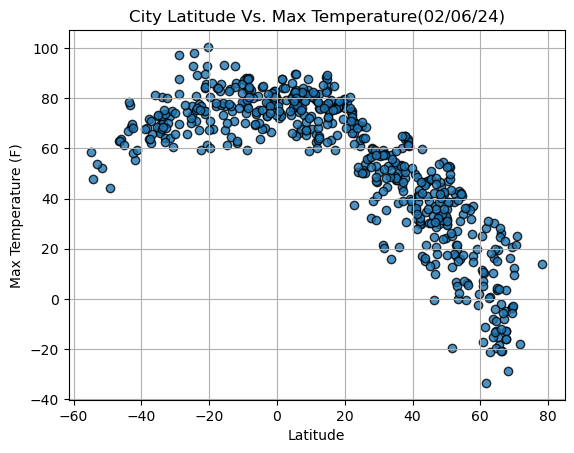

In [58]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

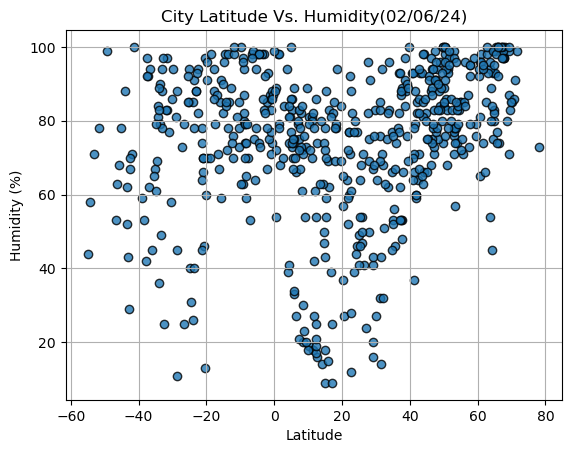

In [59]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

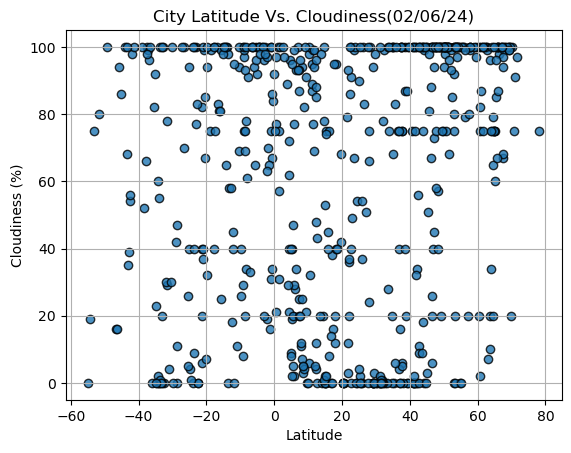

In [60]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

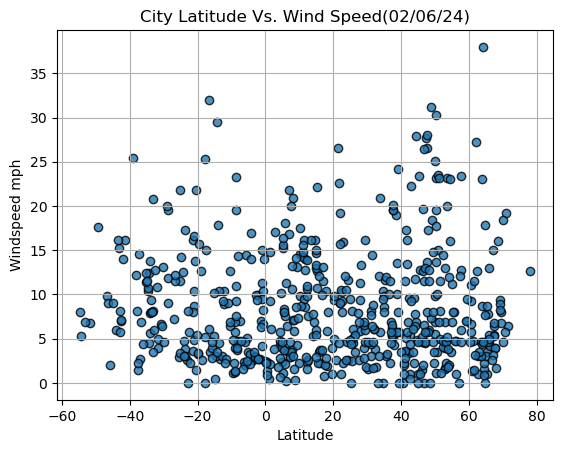

In [61]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-4.92,100,94,6.40,RU,1707274887
7,helena valley west central,46.6629,-112.0604,37.06,94,100,0.00,US,1707275020
9,mount pearl,47.5166,-52.7813,31.32,91,100,27.63,CA,1707274857
10,petropavlovsk-kamchatsky,53.0452,158.6483,19.99,76,0,4.00,RU,1707274781
11,iqaluit,63.7506,-68.5145,-7.87,54,20,4.61,CA,1707274790


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,62.19,62,96,2.75,SH,1707274782
2,adamstown,-25.0660,-130.1015,77.02,85,94,11.54,PN,1707274783
3,maceio,-9.6658,-35.7353,78.24,100,40,1.14,BR,1707274813
4,grytviken,-54.2811,-36.5092,47.95,58,19,5.30,GS,1707274781
5,port saint john's,-31.6229,29.5448,72.73,83,78,3.91,ZA,1707274845


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8922242084824106


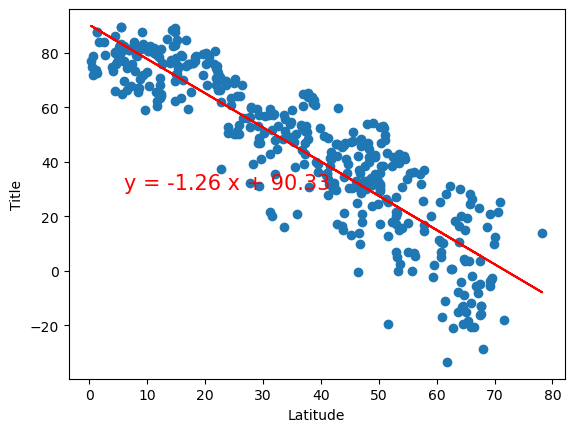

In [65]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.49212805158382444


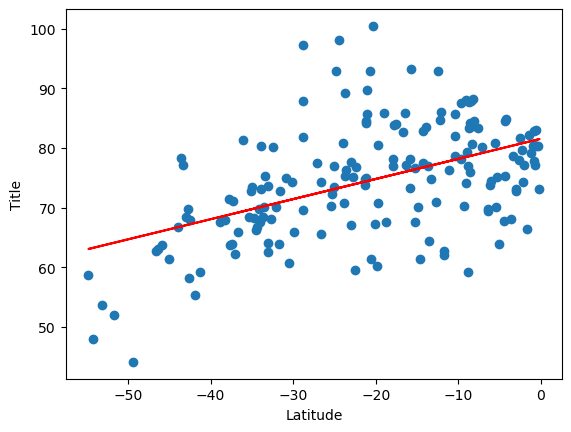

In [66]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.47134265444062107


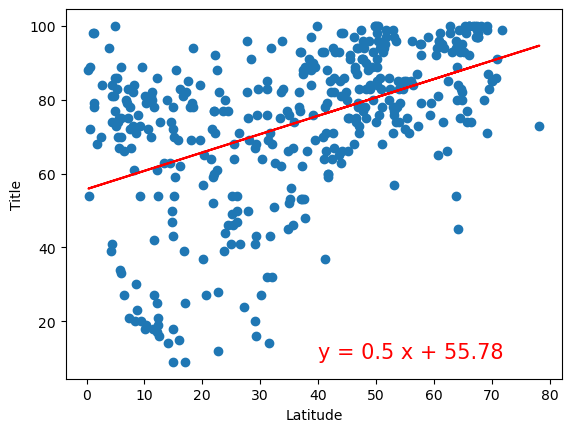

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.30518412413262525


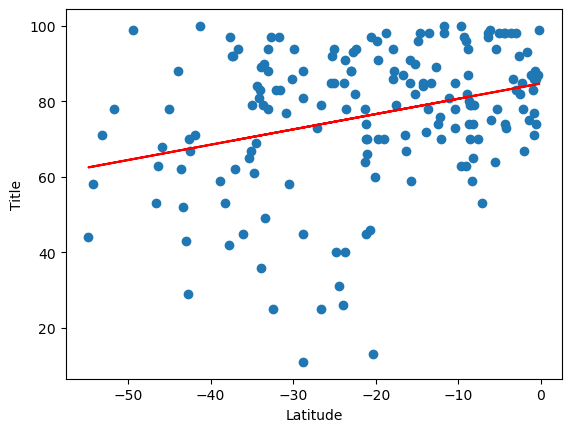

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3475645433475886


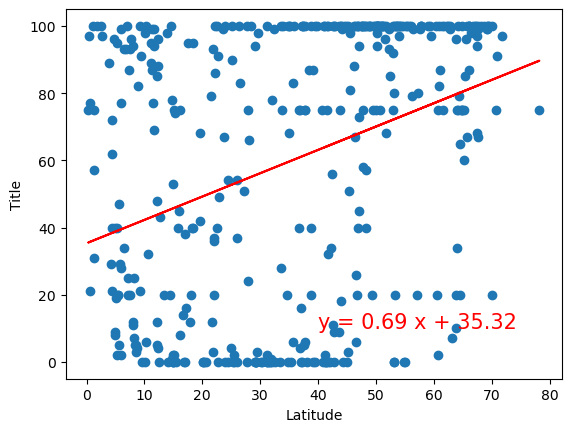

In [72]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.21887552613613473


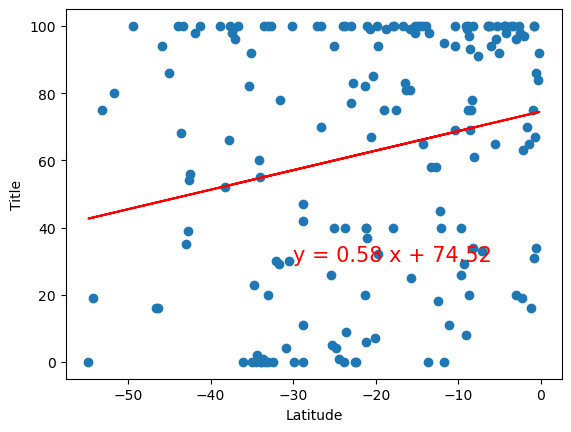

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.04066077144770078


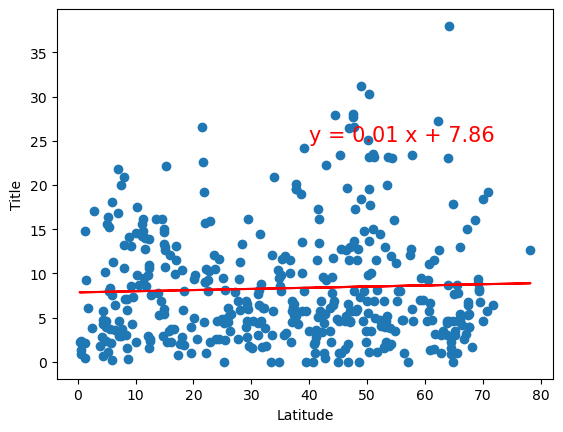

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.15732882079213772


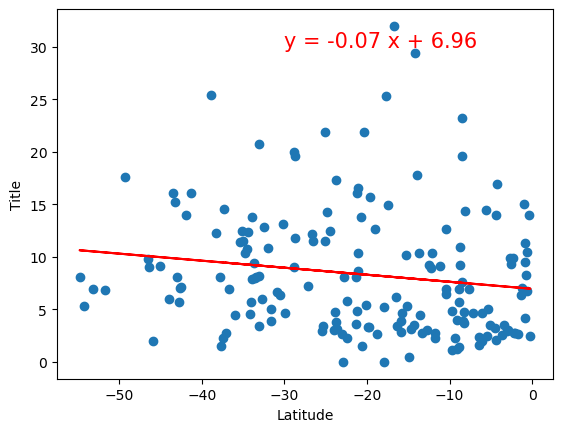

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE